<a href="https://colab.research.google.com/github/kaziizharul/KAZI_IZHARUL_ISLAM/blob/main/student_performance_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="
    background: linear-gradient(135deg, #0f172a, #020617);
    padding: 30px;
    border-radius: 18px;
    border: 1.5px solid #38bdf8;
    box-shadow: 0 0 25px rgba(56, 189, 248, 0.35);
    color: #e5e7eb;
    font-family: Arial, sans-serif;
">

<h1 style="color:#38bdf8; text-align:center;">
📊 Student Performance Prediction – Machine Learning Overview
</h1>

<hr style="border:1px solid #334155">

<h2 style="color:#22d3ee;">🔍 Problem Statement</h2>
<p>
The objective of this project is to analyze various academic and lifestyle factors
that influence a student's academic performance and to build a machine learning
model that accurately predicts the <b>Performance Index</b>.
</p>

<h2 style="color:#22d3ee;">📁 Dataset Description</h2>
<ul>
    <li><b>Hours Studied</b> – Daily study duration</li>
    <li><b>Previous Scores</b> – Past academic performance</li>
    <li><b>Extracurricular Activities</b> – Participation (Yes/No)</li>
    <li><b>Sleep Hours</b> – Average daily sleep</li>
    <li><b>Sample Question Papers Practiced</b> – Practice intensity</li>
    <li><b>Performance Index</b> – Target variable (continuous)</li>
</ul>

<h2 style="color:#22d3ee;">📊 Exploratory Data Analysis (EDA)</h2>
<ul>
    <li>Distribution analysis of performance index</li>
    <li>Univariate analysis of numerical features</li>
    <li>Bivariate analysis between features and target</li>
    <li>Categorical feature comparison using boxplots</li>
    <li>Correlation heatmap to identify influential features</li>
</ul>

<h2 style="color:#22d3ee;">⚙️ Data Preprocessing</h2>
<ul>
    <li>Numerical features standardized using <b>StandardScaler</b></li>
    <li>Categorical features encoded using <b>OneHotEncoder</b></li>
    <li>Pipeline and ColumnTransformer for clean workflow</li>
    <li>80-20 Train-Test split for model validation</li>
</ul>

<h2 style="color:#22d3ee;">🤖 Machine Learning Models</h2>
<ul>
    <li>Random Forest Regressor</li>
    <li>Gradient Boosting Regressor</li>
    <li>XGBoost Regressor (Best Performing)</li>
</ul>

<h2 style="color:#22d3ee;">📈 Model Evaluation Metrics</h2>
<ul>
    <li><b>R² Score</b> – Measures explained variance</li>
    <li><b>MAE</b> – Mean Absolute Error</li>
    <li><b>RMSE</b> – Root Mean Squared Error</li>
</ul>

<h2 style="color:#22d3ee;">📉 Visualization of Results</h2>
<ul>
    <li>Actual vs Predicted performance plot</li>
    <li>Residual error distribution</li>
    <li>Feature correlation visualization</li>
</ul>

<h2 style="color:#22d3ee;">🏆 Conclusion</h2>
<p>
The project successfully demonstrates how academic habits and lifestyle choices
impact student performance. Among all models tested, <b>Gradient Boosting</b> provided
the highest accuracy with strong generalization capability.
</p>

</div>


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

sns.set(style="darkgrid")
plt.rcParams["figure.figsize"] = (8,5)

In [3]:
df = pd.read_csv("/content/StudentPerformance.csv")

In [4]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [5]:
df.shape

(10000, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [7]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


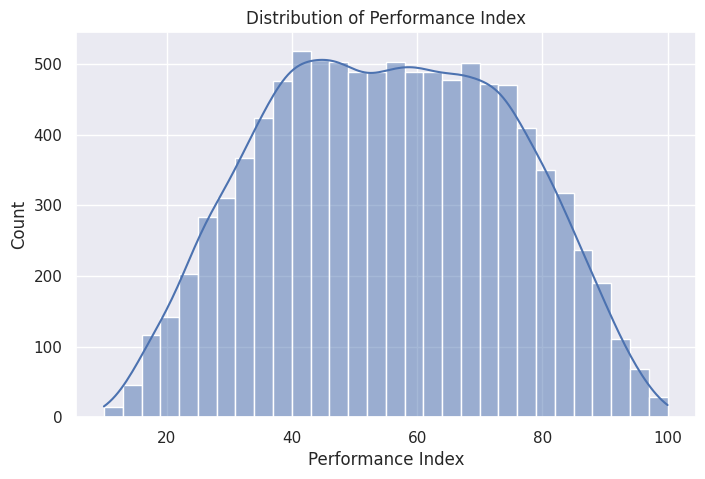

In [8]:
sns.histplot(df["Performance Index"], bins=30, kde=True)
plt.title("Distribution of Performance Index")
plt.show()

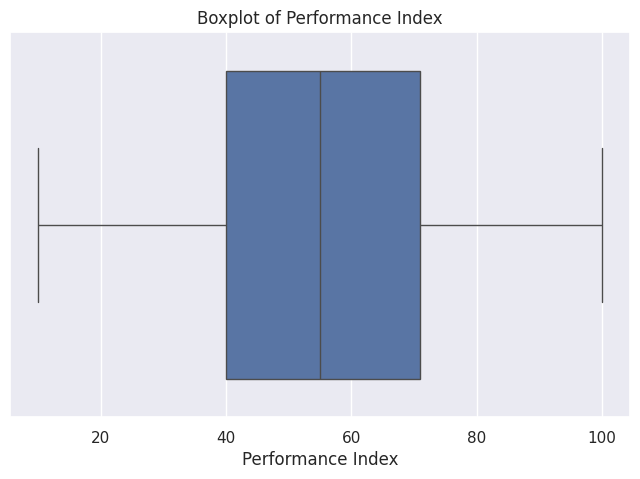

In [9]:
sns.boxplot(x=df["Performance Index"])
plt.title("Boxplot of Performance Index")
plt.show()

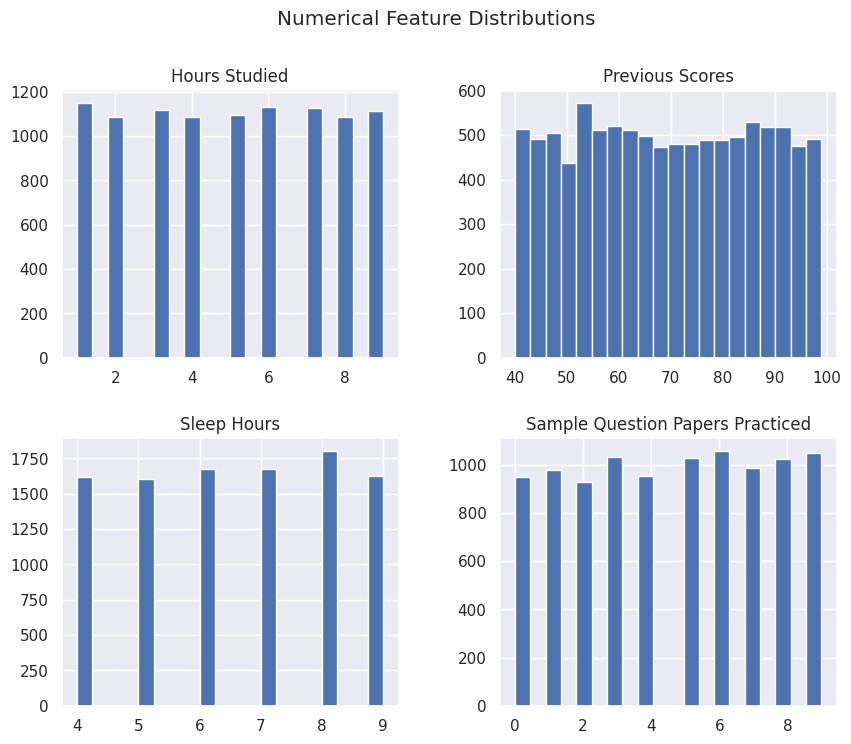

In [10]:
num_cols = [
    "Hours Studied",
    "Previous Scores",
    "Sleep Hours",
    "Sample Question Papers Practiced"
]

df[num_cols].hist(bins=20, figsize=(10,8))
plt.suptitle("Numerical Feature Distributions")
plt.show()

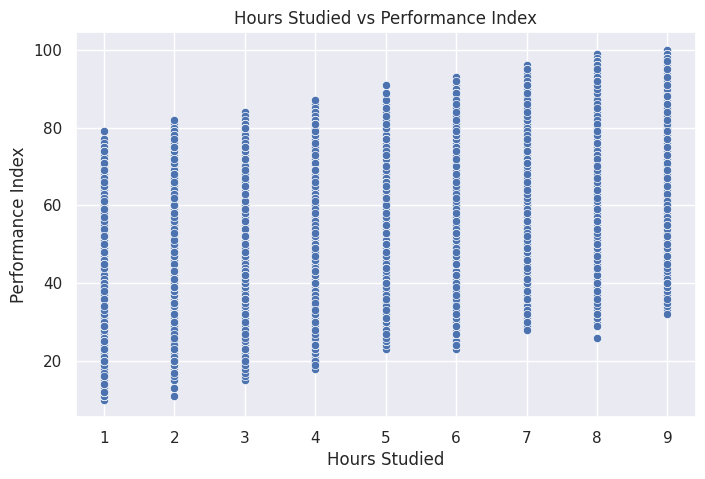

In [11]:
sns.scatterplot(x="Hours Studied", y="Performance Index", data=df)
plt.title("Hours Studied vs Performance Index")
plt.show()

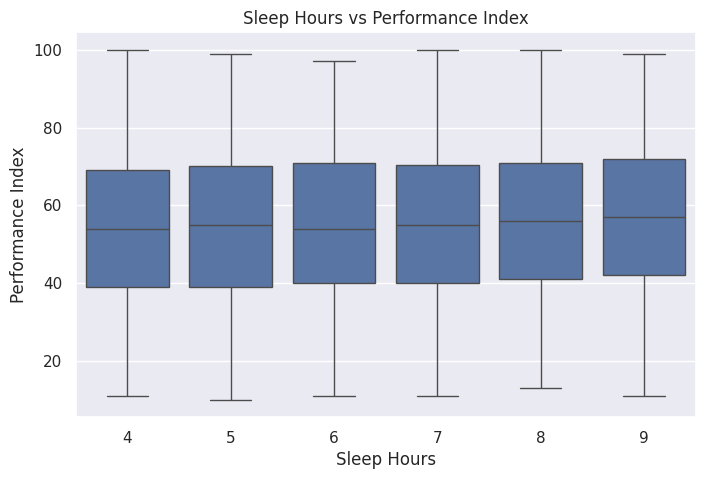

In [12]:
sns.boxplot(x="Sleep Hours", y="Performance Index", data=df)
plt.title("Sleep Hours vs Performance Index")
plt.show()

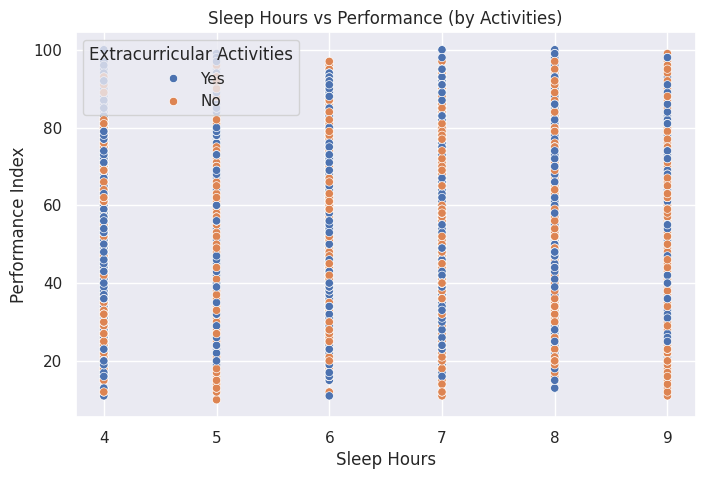

In [13]:
sns.scatterplot(
    x="Sleep Hours",
    y="Performance Index",
    hue="Extracurricular Activities",
    data=df
)
plt.title("Sleep Hours vs Performance (by Activities)")
plt.show()

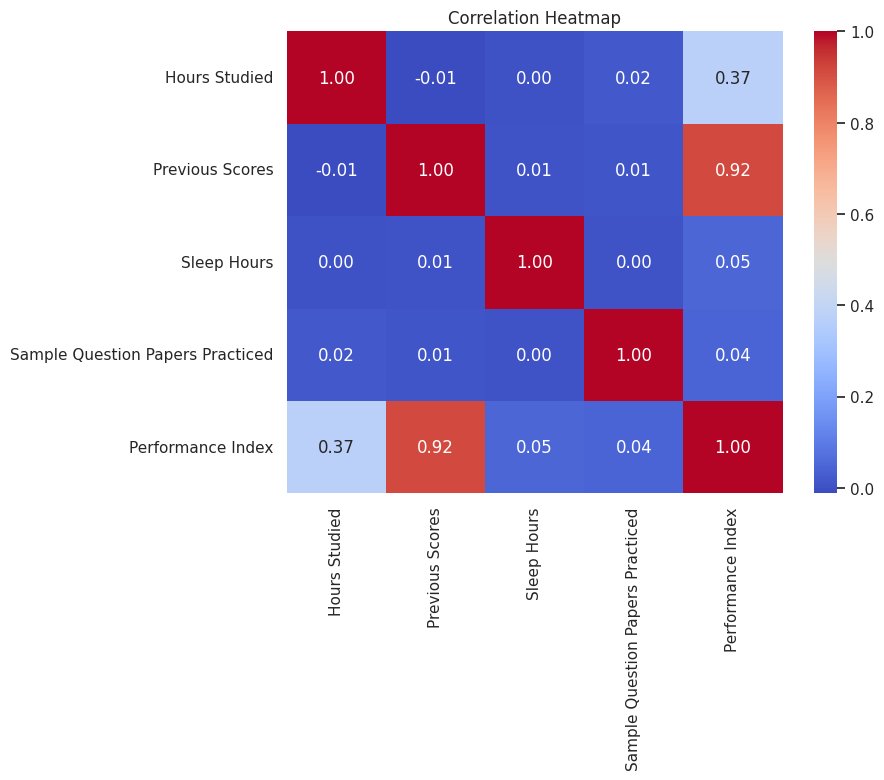

In [14]:
plt.figure(figsize=(8,6))
corr = df[num_cols + ["Performance Index"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [15]:
X = df.drop(columns=["Performance Index"])
y = df["Performance Index"]

categorical_cols = ["Extracurricular Activities"]
numerical_cols = num_cols

In [16]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(drop="first"), categorical_cols)
    ]
)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 8000
Testing samples: 2000


In [18]:
models = {
    "Random Forest": RandomForestRegressor(
        n_estimators=300,
        max_depth=12,
        random_state=42
    ),

    "Gradient Boosting": GradientBoostingRegressor(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=4,
        random_state=42
    ),

    "XGBoost": XGBRegressor(
        n_estimators=400,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.9,
        colsample_bytree=0.9,
        random_state=42
    )
}

results = {}

for name, model in models.items():
    pipeline = Pipeline([
        ("preprocess", preprocessor),
        ("model", model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results[name] = r2

    print(f"\n{name}")
    print("-" * 30)
    print(f"R2 Score : {r2:.4f}")
    print(f"MAE      : {mae:.2f}")
    print(f"RMSE     : {rmse:.2f}")


Random Forest
------------------------------
R2 Score : 0.9867
MAE      : 1.77
RMSE     : 2.22

Gradient Boosting
------------------------------
R2 Score : 0.9884
MAE      : 1.65
RMSE     : 2.07

XGBoost
------------------------------
R2 Score : 0.9884
MAE      : 1.65
RMSE     : 2.08


In [19]:
best_model_name = max(results, key=results.get)
print("Best Model:", best_model_name)

Best Model: Gradient Boosting


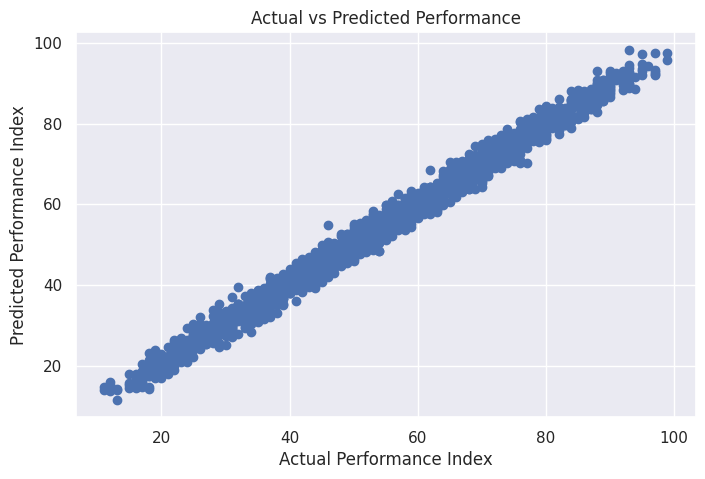

In [20]:
best_pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("model", models[best_model_name])
])

best_pipeline.fit(X_train, y_train)
y_pred_best = best_pipeline.predict(X_test)

plt.scatter(y_test, y_pred_best)
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Actual vs Predicted Performance")
plt.show()

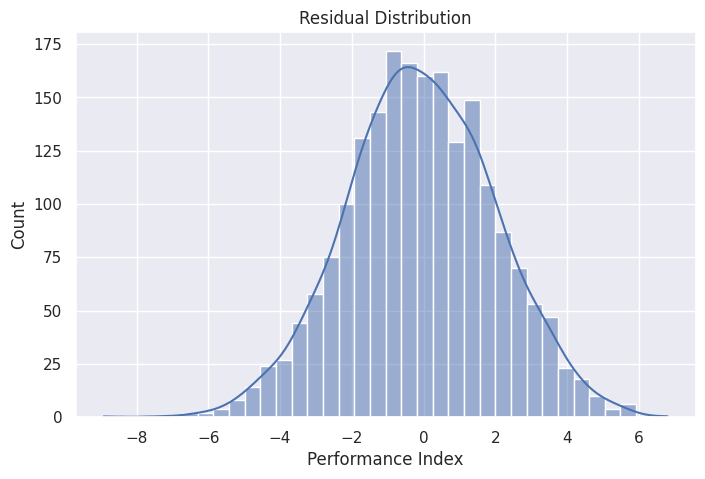

In [21]:
residuals = y_test - y_pred_best

sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()